In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from re import search
import warnings

pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [2]:
raw = pd.read_csv('./dataset_train_test.csv', sep=';')
raw.sample(n=5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
162,JUUL Labs,Data engineer,MariaDB/MongoDB/NoSQ/SQL/Hadoop/Hive,Master,2,Paris
6484,NaN,Data scientist,SPSS/Excel/SAS/R/machine learning/AI/Scoring,Master,"0,5",Lille
6298,NaN,Data scientist,R/machine learning/Excel/VBA,MSc,"3,5",Marseille
5920,University of Texas at Austin,Data scientist,R/Python/Spark/Pycharm/SAS/SQL,PhD,NaN,Paris
2390,ICF,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,MSc,"2,5",Nantes


In [3]:
len(raw)

9562

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    7636 non-null   object
 1   Metier        9562 non-null   object
 2   Technologies  9562 non-null   object
 3   Diplome       9562 non-null   object
 4   Experience    8531 non-null   object
 5   Ville         9562 non-null   object
dtypes: object(6)
memory usage: 448.3+ KB


In [5]:
# Change the data type of the experience
raw['Experience'] = raw['Experience'].apply(
    lambda x : float(str(x).replace(',', '.')),
).astype(float)
raw.sample(n=5)

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
7197,Workbridge Associates,Data scientist,Excel/VBA/R,Master,0.5,Lyon
545,Mathematica Policy Research,Data engineer,Python/Java/Linux/GNU,Bachelor,0.5,Lyon
2836,"Moxie Interactive, Inc.",Lead data scientist,R/Python/Spark/Pycharm/SAS/SQL,Bachelor,4.0,Lyon
9065,Health & Human Services Comm,Data architecte,Java/Python/Linux,Master,4.0,Bordeaux
9427,NaN,Data engineer,Java/Linux/GNU/Docker,Master,1.5,Marseille


In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9562 entries, 0 to 9561
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Entreprise    7636 non-null   object 
 1   Metier        9562 non-null   object 
 2   Technologies  9562 non-null   object 
 3   Diplome       9562 non-null   object 
 4   Experience    8531 non-null   float64
 5   Ville         9562 non-null   object 
dtypes: float64(1), object(5)
memory usage: 448.3+ KB


In [7]:
raw.describe(include='all')

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,7636,9562,9562,9562,8531.000000,9562
unique,1320,4,57,13,NaN,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,NaN,Paris
freq,598,3865,539,3314,NaN,2011
mean,NaN,NaN,NaN,NaN,2.812449,NaN
std,NaN,NaN,NaN,NaN,2.706185,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,NaN,NaN,3.500000,NaN


In [8]:
raw.isnull().sum()

Entreprise      1926
Metier             0
Technologies       0
Diplome            0
Experience      1031
Ville              0
dtype: int64

In [9]:
# Remove duplicates
raw_no_duplicates = raw.drop_duplicates()
print(len(raw_no_duplicates))
raw_no_duplicates.sample(n=5)

9461


,Entreprise,Metier,Technologies,Diplome,Experience,Ville
3463,Conagra Brands,Data architecte,Hadoop(HDFS)/Elasticsearch,Master,3.0,Rennes
7525,Cogo Labs,Data scientist,SQL/R/Python//Big data,Bachelor,0.0,Paris
4306,h2o.ai,Data scientist,VBA/Python/Excel/R,Master,2.0,Paris
8439,The Home Depot,Data engineer,Java/Hadoop/HDFS/Yarn,Master,NaN,Paris
6194,Wayfair,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Bachelor,3.5,Lille


In [10]:
# Individual technologies
unique_technologies = np.array(list(set([
    technology.lower()
    for technologies in np.unique(raw_no_duplicates[['Technologies']].values)
    for technology in technologies.strip().split('/')
    if technology
])))
unique_technologies

array(['elasticsearch', 'vertica', 'deep learning', 'vba', 'mysql', 'sas',
       'perl', 'postgresql', 'matplotlib', 'r', 'pycharm', 'linux',
       'ruby', 'gnu', 'c', 'tensorflow', 'excel', 'sql', 'oracle',
       'hadoop(hdfs)', 'tableau', 'spss', 'kafka', 'hadoop', 'teradata',
       'nosq', 'yarn', 'c++', 'scikit-learn', 'numpy', 'docker', 'kibana',
       'ai', 'python', 'hbase', 'scoring', 'pig', 'nosql',
       'machine learning', 'windows', 'hive', 'mongodb', 'redshift',
       'scala', 'aws', 'cassandra', 'map-reduce', 'microsoft azure',
       'anglais', 'pyspark', 'matlab', 'hdfs', 'java', 'spark',
       'big data', 'mariadb'], dtype='<U16')

In [11]:
# Create separate columns for each technologies known
def set_individual_technology(row, unique_technologies):
    row_technologies = np.array(list(filter(None, row['Technologies'].lower().strip().split('/'))))
    individual_technology = np.isin(unique_technologies, row_technologies).astype(int)
    return np.concatenate((row, individual_technology))

raw_with_individual_technologies = raw_no_duplicates.apply(
    lambda row: set_individual_technology(row, unique_technologies),
    axis=1,
    result_type='expand'
)
raw_with_individual_technologies.columns = [*raw_no_duplicates.columns, *unique_technologies.tolist()]
raw_with_individual_technologies.drop('Technologies', axis=1, inplace=True)
raw_with_individual_technologies.sample(n=5)

,Entreprise,Metier,Diplome,Experience,Ville,elasticsearch,vertica,deep learning,vba,mysql,sas,perl,postgresql,matplotlib,r,pycharm,linux,ruby,gnu,c,tensorflow,excel,sql,oracle,hadoop(hdfs),tableau,spss,kafka,hadoop,teradata,nosq,yarn,c++,scikit-learn,numpy,docker,kibana,ai,python,hbase,scoring,pig,nosql,machine learning,windows,hive,mongodb,redshift,scala,aws,cassandra,map-reduce,microsoft azure,anglais,pyspark,matlab,hdfs,java,spark,big data,mariadb
3583,NaN,Data scientist,Master,2.0,Paris,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2296,NaN,Data scientist,Phd,2.5,Marseille,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6761,Pharmerit International,Data architecte,MSc,2.0,Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2626,Ball Aerospace,Data scientist,PhD,0.0,Marseille,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7732,AirSage,Data engineer,MSc,1.5,Paris,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# Drop Ville and Entreprise 
# Entreprise is irrelevant filtering candidate for a job offer
# Ville is also irrelevant since candidates can apply from anywhere
raw_filtered = raw_with_individual_technologies.drop(['Entreprise', 'Ville'], axis=1)
raw_filtered.sample(n=5)

,Metier,Diplome,Experience,elasticsearch,vertica,deep learning,vba,mysql,sas,perl,postgresql,matplotlib,r,pycharm,linux,ruby,gnu,c,tensorflow,excel,sql,oracle,hadoop(hdfs),tableau,spss,kafka,hadoop,teradata,nosq,yarn,c++,scikit-learn,numpy,docker,kibana,ai,python,hbase,scoring,pig,nosql,machine learning,windows,hive,mongodb,redshift,scala,aws,cassandra,map-reduce,microsoft azure,anglais,pyspark,matlab,hdfs,java,spark,big data,mariadb
3093,Data scientist,Phd,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9422,Data scientist,No diploma,0.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1986,Data engineer,MSc,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3916,Data architecte,MSc,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1224,Data architecte,Master,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


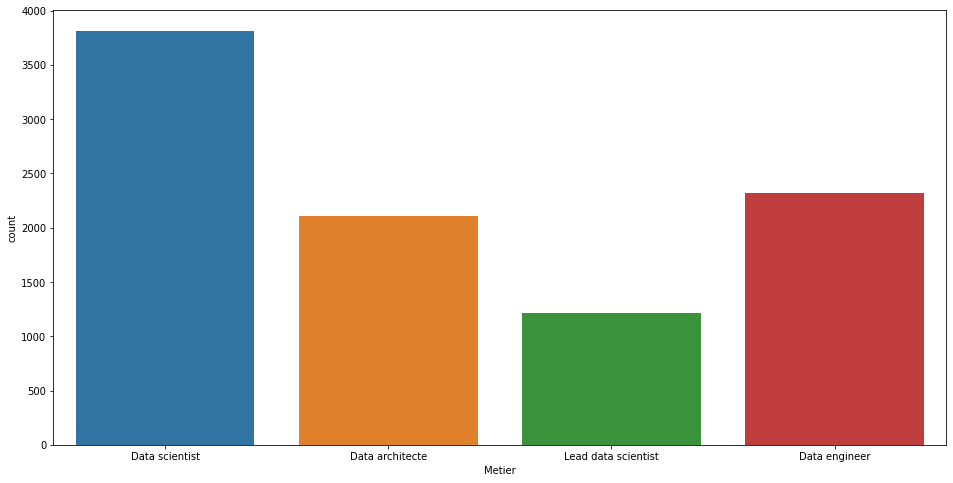

In [13]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(data=raw_filtered, x='Metier')
plt.show()

The dataset is imbalanced with a majority of Data Scientist.

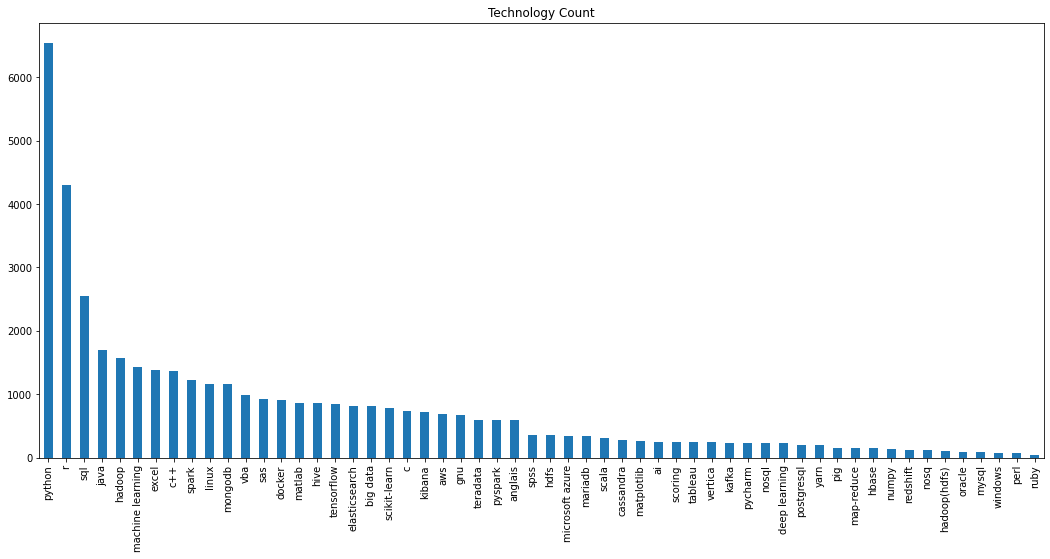

In [14]:
# Analyze the skills
fig = plt.figure(figsize=(18, 8))
raw_filtered[unique_technologies].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Technology Count')
plt.show()

Most profiles have skills in Python, R, SQL

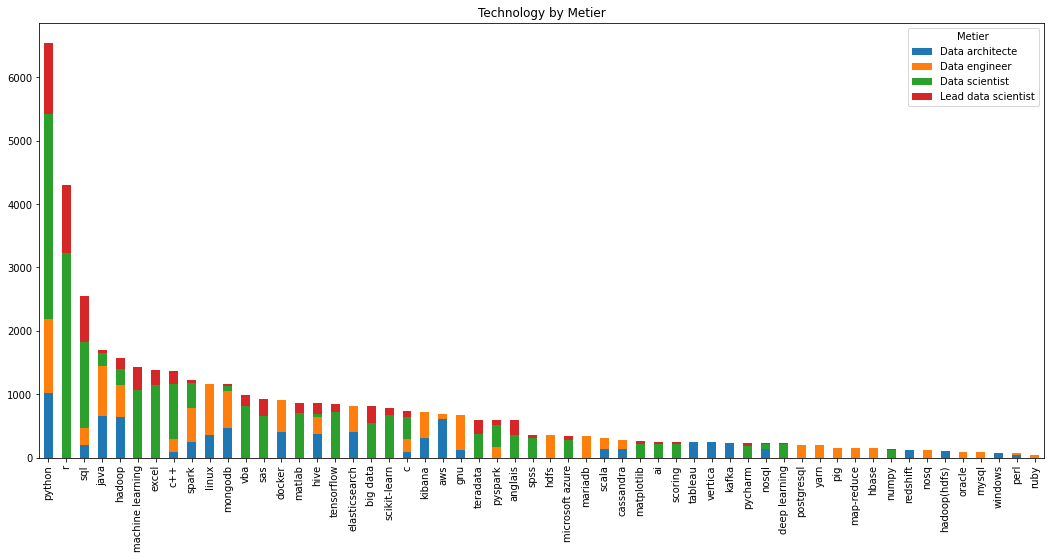

In [15]:
# Analyze the skills by metiers
tech_by_metier = raw_filtered[[*unique_technologies, 'Metier']].groupby(
    ['Metier']
).sum()
tech_by_metier = tech_by_metier[tech_by_metier.sum().sort_values(ascending=False).index].transpose()
tech_by_metier.plot(kind="bar", stacked=True, figsize=(18, 8))
plt.title('Technology by Metier')
plt.show()

We can quickly identify some technologies only known by Data architecte and Data Engineer. <br>
For example Tableau is only for Data architecte and Yarn is only for Data Engineers <br>
It is a bit harder to dissociate Data scientist and Lead Data scientist since they all know the same technologies <br>
We can also observe that most known skils are known by all workers, Python, SQL, Java, Hadoop

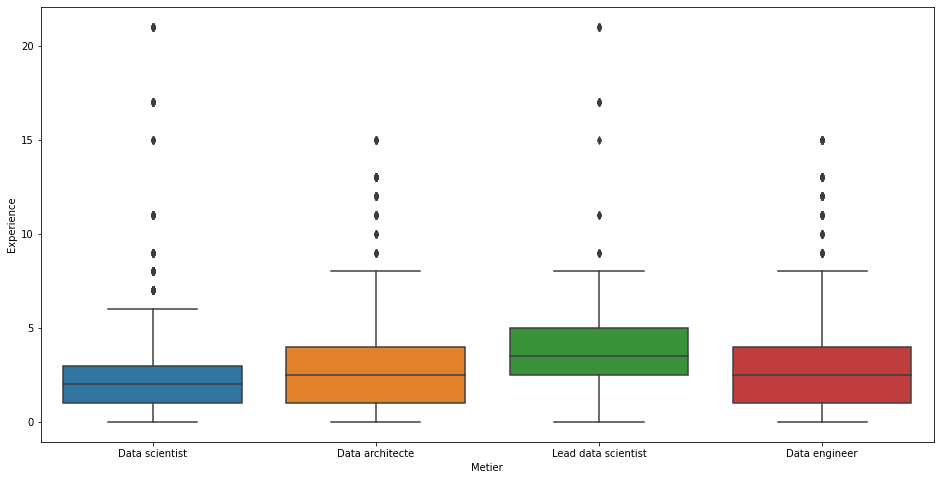

In [16]:
# Analyze Experience
fig = plt.figure(figsize=(16, 8))
sns.boxplot(data=raw_filtered, x='Metier', y='Experience')
plt.show()

Here we can see a clear different between the quantiles of the Data scientist and the Lead data scientist. <br>
The experience might therefore help us to dissociate them

In [17]:
# Analyze Diplome
# There are duplicates values in the diplome column
def normalize_diplome(diplome):
    if (diplome.lower().startswith('b')):
        return 'bachelor'
    elif (diplome.lower().startswith('m')):
        return 'master'
    elif (diplome.lower().startswith('p')):
        return 'phd'
    else:
        return 'no'

raw_filtered['Diplome'] = raw_filtered['Diplome'].apply(
    normalize_diplome,
)

<Figure size 1152x576 with 0 Axes>

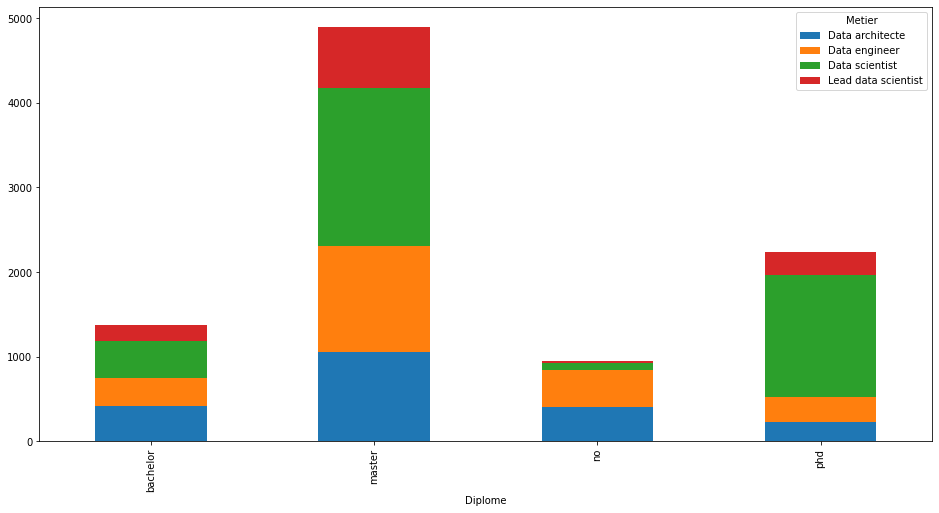

In [18]:
# Check the diplome by metier
fig = plt.figure(figsize=(16, 8))
raw_filtered.groupby(['Diplome', 'Metier']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 8))
plt.show()

Degree holders can hold any positions. However very few non-degree personnel are Lead data scientist or data scientist <br> We can further investigate

In [19]:
def has_diplome(diplome):
    if (diplome != 'no'):
        return 'yes'
    return 'no'

raw_filtered['has_diplome'] = raw_filtered['Diplome'].apply(
    has_diplome
)

<Figure size 1152x576 with 0 Axes>

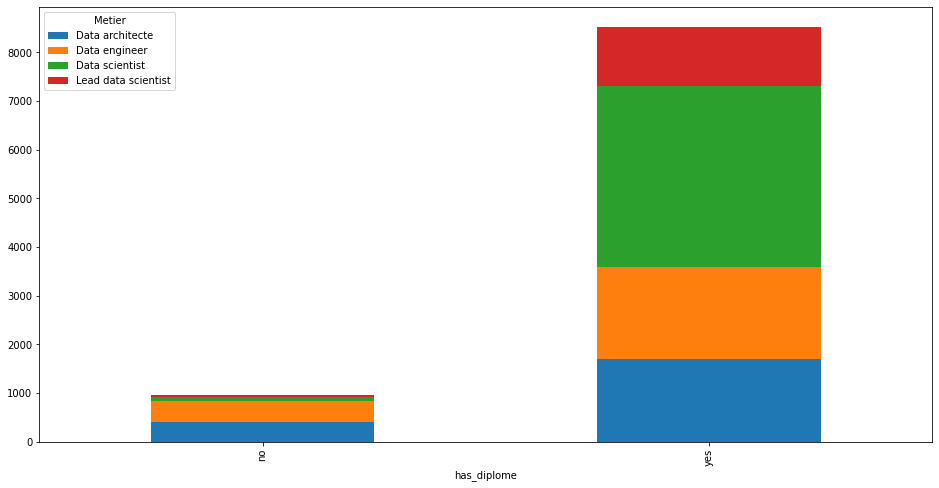

In [20]:
fig = plt.figure(figsize=(16, 8))
raw_filtered.groupby(['has_diplome', 'Metier']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 8))
plt.show()

We can see that you have very few chances to be a lead data scientist or a data scientist if you don't have any diplome

In [21]:
# Analyze Entreprise
def has_entrepise(entreprise):
    if (not pd.isna(entreprise)):
        return 'yes'
    return 'no'

raw_filtered['has_entreprise'] = raw_with_individual_technologies['Entreprise'].apply(
    has_entrepise
)

<Figure size 1152x576 with 0 Axes>

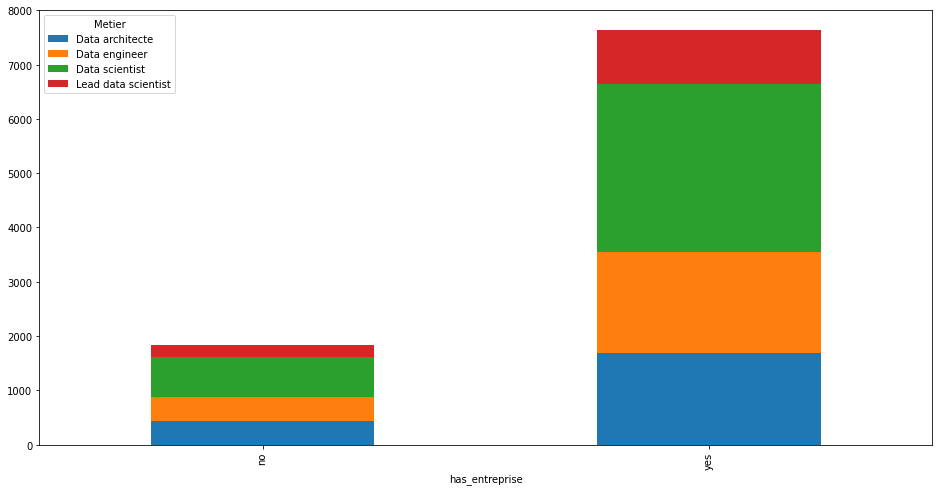

In [22]:
fig = plt.figure(figsize=(16, 8))
raw_filtered.groupby(['has_entreprise', 'Metier']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 8))
plt.show()

We can also see that you have few chances to be a lead data scientist or a data scientist if you don't have any diplome

In [23]:
# Feature engineering for experience
# You can consider as senior after 5 years of experience
raw_filtered['is_senior'] = (raw_filtered['Experience'] >= 5.0).astype(int)

<Figure size 1152x576 with 0 Axes>

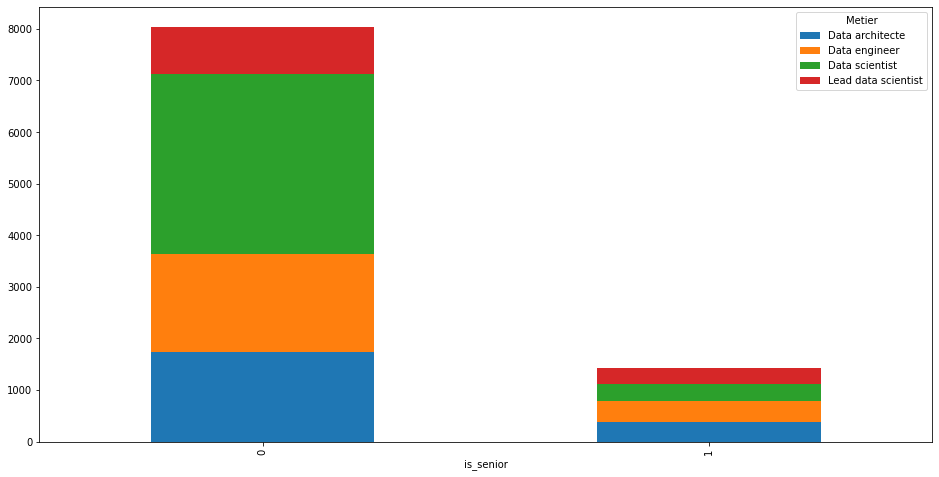

In [24]:
fig = plt.figure(figsize=(16, 8))
raw_filtered.groupby(['is_senior', 'Metier']).size().unstack().plot(kind='bar', stacked=True, figsize=(16, 8))
plt.show()

Considering the proportion of our classes, we can see that there is very few data scientist with more than 5 years but a good number of lead data scientist with more than 5 years

In [25]:
raw_filtered.sample(n=5)

,Metier,Diplome,Experience,elasticsearch,vertica,deep learning,vba,mysql,sas,perl,postgresql,matplotlib,r,pycharm,linux,ruby,gnu,c,tensorflow,excel,sql,oracle,hadoop(hdfs),tableau,spss,kafka,hadoop,teradata,nosq,yarn,c++,scikit-learn,numpy,docker,kibana,ai,python,hbase,scoring,pig,nosql,machine learning,windows,hive,mongodb,redshift,scala,aws,cassandra,map-reduce,microsoft azure,anglais,pyspark,matlab,hdfs,java,spark,big data,mariadb,has_diplome,has_entreprise,is_senior
7945,Data scientist,master,3.5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,yes,yes,0
8633,Data architecte,master,3.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,yes,yes,0
7639,Lead data scientist,phd,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,yes,0
5048,Data scientist,phd,1.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,yes,yes,0
4450,Data scientist,master,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,yes,yes,0


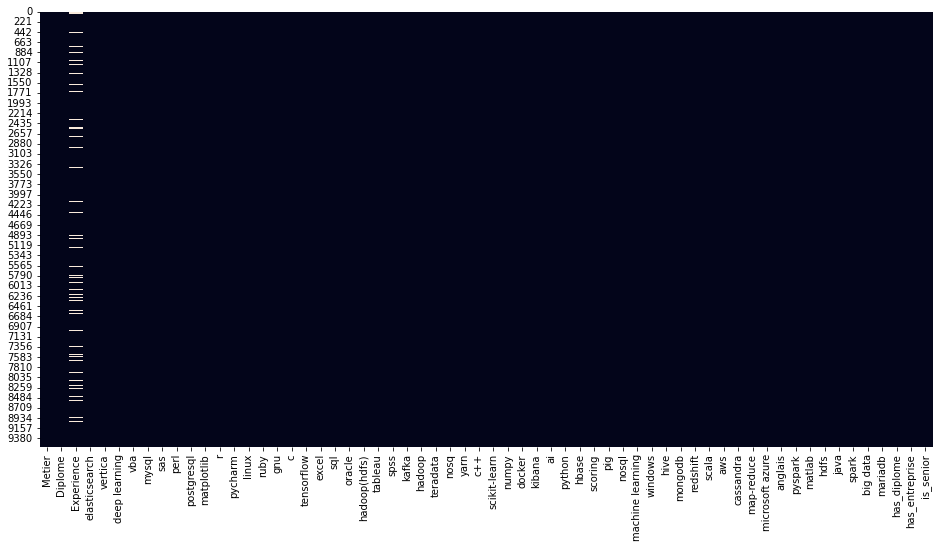

In [26]:
# Checking missing values
fig = plt.figure(figsize=(16, 8))
sns.heatmap(raw_filtered.isnull(), cbar=False)
plt.show()

In [27]:
# Investigate missing values in experience
# Missing experience can due to data not recorder
# Or it can also mean no experience, 0
# The ideal solution would be to discuss with the client 
# But due to time, I will drop these values
raw_cleaned = raw_filtered.dropna(subset=['Experience'])
raw_cleaned.isnull().sum().sum()

0

In [28]:
raw_cleaned.sample(n=5)

,Metier,Diplome,Experience,elasticsearch,vertica,deep learning,vba,mysql,sas,perl,postgresql,matplotlib,r,pycharm,linux,ruby,gnu,c,tensorflow,excel,sql,oracle,hadoop(hdfs),tableau,spss,kafka,hadoop,teradata,nosq,yarn,c++,scikit-learn,numpy,docker,kibana,ai,python,hbase,scoring,pig,nosql,machine learning,windows,hive,mongodb,redshift,scala,aws,cassandra,map-reduce,microsoft azure,anglais,pyspark,matlab,hdfs,java,spark,big data,mariadb,has_diplome,has_entreprise,is_senior
3154,Data architecte,phd,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,yes,yes,0
2263,Data scientist,phd,1.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,yes,0
1043,Data scientist,bachelor,7.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,yes,yes,1
5344,Data architecte,no,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,no,no,0
1872,Data scientist,bachelor,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,yes,yes,0


In [29]:
# Building the first baseline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = raw_cleaned.drop('Metier', axis=1)
le = preprocessing.LabelEncoder()
le.fit(raw_cleaned['Metier'])
y = le.transform(raw_cleaned['Metier'])
print(le.classes_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

['Data architecte' 'Data engineer' 'Data scientist' 'Lead data scientist']


In [30]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def display_confusion_matrix(y_val, y_pred, labels):
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    return disp

In [31]:
# Random Forest Baseline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


baseline_preprocessor = ColumnTransformer(
    transformers=[
        ("diplome", preprocessing.OrdinalEncoder(
            categories=[['no', 'bachelor', 'master', 'phd']]
        ), ['Diplome']),
        ("booleans", preprocessing.OrdinalEncoder(
            categories=[['no', 'yes'], ['no', 'yes']]
        ), ['has_diplome', 'has_entreprise'])
    ]
)

baseline_rf_pipeline = Pipeline(
    steps=[
        ('preprocessor', baseline_preprocessor),
        ('classifier', RandomForestClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__n_estimators': [10, 14, 18],
    'classifier__max_depth': [1, 3, 8, 10]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
grid_search = GridSearchCV(baseline_rf_pipeline, parameters, cv=cv)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
rf_baseline = grid_search.best_estimator_

{'classifier__max_depth': 3, 'classifier__n_estimators': 14}


In [32]:
from sklearn.metrics import classification_report
y_pred_rf_baseline = rf_baseline.predict(X_val)
print(classification_report(y_val, y_pred_rf_baseline, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.44      0.03      0.06       333
      Data engineer       0.45      0.16      0.24       331
     Data scientist       0.43      0.98      0.59       525
Lead data scientist       0.00      0.00      0.00       162

           accuracy                           0.43      1351
          macro avg       0.33      0.29      0.22      1351
       weighted avg       0.38      0.43      0.30      1351



In [33]:
from sklearn.neighbors import KNeighborsClassifier

baseline_knn_pipeline = Pipeline(
    steps=[
        ('preprocessor', baseline_preprocessor),
        ('classifier', KNeighborsClassifier())
    ]
)

parameters = {
    'classifier__n_neighbors': [8, 10, 12, 16],
    'classifier__weights': ['distance', 'uniform']
}

grid_search = GridSearchCV(baseline_knn_pipeline, parameters, cv=cv)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
knn_baseline = grid_search.best_estimator_

{'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}


In [34]:
y_pred_knn_baseline = knn_baseline.predict(X_val)
print(classification_report(y_val, y_pred_knn_baseline, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.37      0.07      0.12       333
      Data engineer       0.45      0.16      0.24       331
     Data scientist       0.43      0.96      0.60       525
Lead data scientist       0.00      0.00      0.00       162

           accuracy                           0.43      1351
          macro avg       0.31      0.30      0.24      1351
       weighted avg       0.37      0.43      0.32      1351



In [35]:
# Since our dataset is unbalanced, let's try to build one classifier for each class
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

baseline_ovr_pipeline = Pipeline(
    steps=[
        ('preprocessor', baseline_preprocessor),
        ('classifier', OneVsRestClassifier(SVC(random_state=0)))
    ]
)

_ = baseline_ovr_pipeline.fit(X_train, y_train)

In [36]:
y_pred_ovr_baseline = baseline_ovr_pipeline.predict(X_val)
print(classification_report(y_val, y_pred_ovr_baseline, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.28      0.52      0.36       333
      Data engineer       0.33      0.28      0.30       331
     Data scientist       0.55      0.47      0.51       525
Lead data scientist       0.00      0.00      0.00       162

           accuracy                           0.38      1351
          macro avg       0.29      0.32      0.29      1351
       weighted avg       0.36      0.38      0.36      1351



In [37]:
from sklearn.tree import ExtraTreeClassifier

baseline_etc_pipeline = Pipeline(
    steps=[
        ('preprocessor', baseline_preprocessor),
        ('classifier', ExtraTreeClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__max_features': ['log2', 'sqrt', 50],
    'classifier__max_depth': [8, 10, 14],
    'classifier__splitter': ['best', 'random']
}

grid_search = GridSearchCV(baseline_etc_pipeline, parameters, cv=cv)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
etc_baseline = grid_search.best_estimator_

{'classifier__max_depth': 8, 'classifier__max_features': 'log2', 'classifier__splitter': 'best'}


In [38]:
y_pred_etc_baseline = etc_baseline.predict(X_val)
print(classification_report(y_val, y_pred_etc_baseline, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.37      0.07      0.12       333
      Data engineer       0.45      0.16      0.24       331
     Data scientist       0.43      0.96      0.60       525
Lead data scientist       0.00      0.00      0.00       162

           accuracy                           0.43      1351
          macro avg       0.31      0.30      0.24      1351
       weighted avg       0.37      0.43      0.32      1351



Looking at the recall, the best performing models are random forest, extra trees, the knn and the one vs rest classifier <br>
However no model is able to classify lead data scientists

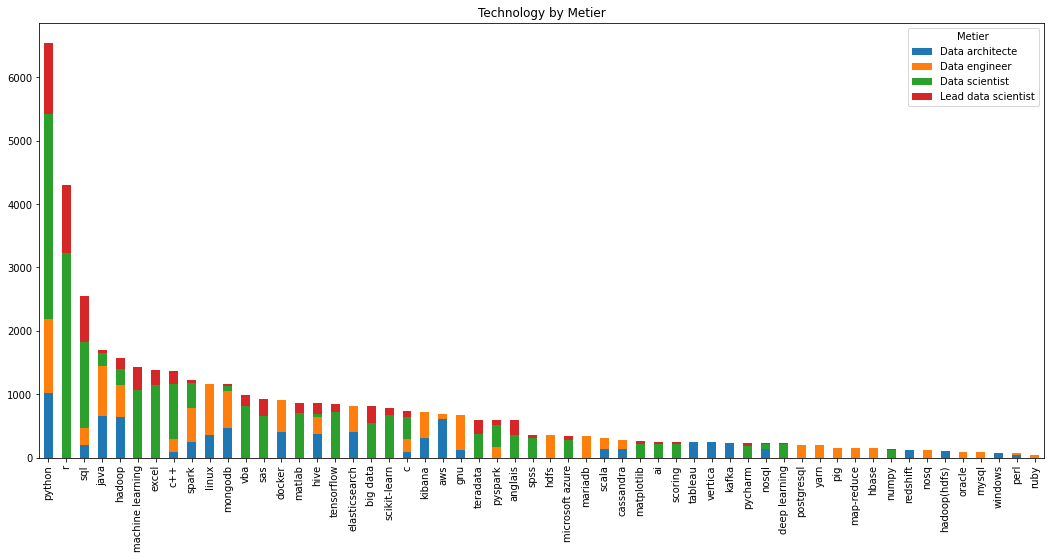

In [39]:
# Analyze the skills by metiers
tech_by_metier = raw_filtered[[*unique_technologies, 'Metier']].groupby(
    ['Metier']
).sum()
tech_by_metier = tech_by_metier[tech_by_metier.sum().sort_values(ascending=False).index].transpose()
tech_by_metier.plot(kind="bar", stacked=True, figsize=(18, 8))
plt.title('Technology by Metier')
plt.show()

In [46]:
# Let's select technologies that are very specific to some classes and check the performance
class_selective_features = [
    'ruby', 'windows', 'oracle', 'mysql', 'hadoop(hdfs)', 'nosq', 'redshift', 'pig', 'map-reduce', 'hbase',
    'yarn', 'postgresql', 'kafka', 'tableau', 'vertica', 'mariadb', 'hdfs', 'numpy', 'deep learning', 'ai', 'scoring',
    'matplotlib', 'pycharm', 'scikit-learn', 'tensorflow', 'teradata', 'anglais', 'big data', 'r', 'machine learning', 
    'microsoft azure', 'spss', 'excel', 'sas', 'vba', 'matlab', 'aws', 'gnu', 'linux', 'Experience'
]

X_first_selection_train = X_train[class_selective_features]
X_first_selection_val = X_val[class_selective_features]

In [47]:
first_selection_rf_pipeline = Pipeline(
    steps=[
        ('classifier', RandomForestClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__n_estimators': [40, 44, 48, 52, 56],
    'classifier__max_depth': [10, 12, 16, 22, 26],
    'classifier__class_weight': [{0:1, 1:1, 2:1, 3:3}]
}

grid_search = GridSearchCV(first_selection_rf_pipeline, parameters, cv=cv)
grid_search.fit(X_first_selection_train, y_train)
print(grid_search.best_params_)
rf_first_selection = grid_search.best_estimator_

{'classifier__class_weight': {0: 1, 1: 1, 2: 1, 3: 3}, 'classifier__max_depth': 12, 'classifier__n_estimators': 52}


In [48]:
y_pred_rf_first_selection = rf_first_selection.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_rf_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.73      0.96      0.83       333
      Data engineer       0.95      0.72      0.82       331
     Data scientist       0.89      0.70      0.78       525
Lead data scientist       0.45      0.70      0.55       162

           accuracy                           0.77      1351
          macro avg       0.76      0.77      0.75      1351
       weighted avg       0.81      0.77      0.78      1351



In [49]:
first_selection_knn_pipeline = Pipeline(
    steps=[
        ('classifier', KNeighborsClassifier())
    ]
)

parameters = {
    'classifier__n_neighbors': [16, 28, 32, 36, 38],
    'classifier__weights': ['distance', 'uniform']
}

grid_search = GridSearchCV(first_selection_knn_pipeline, parameters, cv=cv)
grid_search.fit(X_first_selection_train, y_train)
print(grid_search.best_params_)
knn_first_selection = grid_search.best_estimator_

{'classifier__n_neighbors': 32, 'classifier__weights': 'distance'}


In [50]:
y_pred_knn_first_selection = knn_first_selection.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_knn_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.77      0.88      0.82       333
      Data engineer       0.85      0.79      0.82       331
     Data scientist       0.83      0.84      0.83       525
Lead data scientist       0.51      0.40      0.45       162

           accuracy                           0.79      1351
          macro avg       0.74      0.73      0.73      1351
       weighted avg       0.78      0.79      0.78      1351



In [51]:
first_selection_ovr_pipeline = Pipeline(
    steps=[
        ('classifier', OneVsRestClassifier(SVC(random_state=0)))
    ]
)

_ = first_selection_ovr_pipeline.fit(X_first_selection_train, y_train)

In [52]:
y_pred_ovr_first_selection = first_selection_ovr_pipeline.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_ovr_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.74      0.95      0.83       333
      Data engineer       0.94      0.73      0.82       331
     Data scientist       0.79      0.90      0.85       525
Lead data scientist       0.52      0.21      0.30       162

           accuracy                           0.79      1351
          macro avg       0.75      0.70      0.70      1351
       weighted avg       0.78      0.79      0.77      1351



In [53]:
first_selection_etc_pipeline = Pipeline(
    steps=[
        ('classifier', ExtraTreeClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__max_features': ['log2', 'sqrt'],
    'classifier__max_depth': [10, 14, 18, 24],
    'classifier__splitter': ['best', 'random'],
    'classifier__class_weight': [{0:1, 1:1, 2:1, 3:3}]
}

grid_search = GridSearchCV(first_selection_etc_pipeline, parameters, cv=cv)
grid_search.fit(X_first_selection_train, y_train)
print(grid_search.best_params_)
etc_first_selection = grid_search.best_estimator_

{'classifier__class_weight': {0: 1, 1: 1, 2: 1, 3: 3}, 'classifier__max_depth': 18, 'classifier__max_features': 'log2', 'classifier__splitter': 'random'}


In [54]:
y_pred_etc_first_selection = etc_first_selection.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_etc_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.74      0.96      0.84       333
      Data engineer       0.95      0.73      0.83       331
     Data scientist       0.89      0.73      0.80       525
Lead data scientist       0.47      0.69      0.56       162

           accuracy                           0.78      1351
          macro avg       0.76      0.78      0.76      1351
       weighted avg       0.82      0.78      0.79      1351



We were able to increase the recall of all the classes of our models. <br>
Random Forest gives a more balanced recall

In [55]:
# Try oversampling first selection
from sklearn.utils import resample

training_set = pd.DataFrame(X_first_selection_train, columns=X_first_selection_train.columns)
training_set['Metier'] = y_train
data_architectes = training_set[training_set['Metier'] == 0]
data_engineers = training_set[training_set['Metier'] == 1]
data_scientists = training_set[training_set['Metier'] == 2]
lead_data_scientists = training_set[training_set['Metier'] == 3]

oversample_lead_data_scientists = resample(
    lead_data_scientists, 
    replace=True,
    stratify=lead_data_scientists,
    n_samples=len(data_scientists),
    random_state=0
)

oversample_data_engineers = resample(
    data_engineers,
    replace=True,
    stratify=data_engineers,
    n_samples=len(data_scientists),
    random_state=0
)

oversample_data_architectures = resample(
    data_architectes,
    replace=True,
    stratify=data_architectes,
    n_samples=len(data_scientists),
    random_state=0
)

oversample_train = pd.concat([
    oversample_data_engineers, oversample_data_architectures,
    data_scientists, oversample_lead_data_scientists
])

oversample_train.sample(n=5)

,ruby,windows,oracle,mysql,hadoop(hdfs),nosq,redshift,pig,map-reduce,hbase,yarn,postgresql,kafka,tableau,vertica,mariadb,hdfs,numpy,deep learning,ai,scoring,matplotlib,pycharm,scikit-learn,tensorflow,teradata,anglais,big data,r,machine learning,microsoft azure,spss,excel,sas,vba,matlab,aws,gnu,linux,Experience,Metier
8902,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.5,1
3321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.0,1
5440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,0
5693,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6.0,1
918,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0


In [56]:
X_oversample_train = oversample_train.drop('Metier', axis=1)
y_oversample_train = oversample_train['Metier']

In [57]:
oversample_rf_pipeline = Pipeline(
    steps=[
        ('classifier', RandomForestClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__n_estimators': [14, 20, 26, 28],
    'classifier__max_depth': [5, 8, 12]
}

grid_search = GridSearchCV(oversample_rf_pipeline, parameters, cv=cv)
grid_search.fit(X_oversample_train, y_oversample_train)
print(grid_search.best_params_)
rf_oversample = grid_search.best_estimator_

{'classifier__max_depth': 8, 'classifier__n_estimators': 20}


In [58]:
y_pred_rf_oversample = rf_oversample.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_rf_oversample, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.73      0.97      0.84       333
      Data engineer       0.96      0.72      0.82       331
     Data scientist       0.91      0.65      0.76       525
Lead data scientist       0.43      0.78      0.55       162

           accuracy                           0.76      1351
          macro avg       0.76      0.78      0.74      1351
       weighted avg       0.82      0.76      0.77      1351



In [59]:
oversample_knn_pipeline = Pipeline(
    steps=[
        ('classifier', KNeighborsClassifier())
    ]
)

parameters = {
    'classifier__n_neighbors': [240, 280, 300, 340],
    'classifier__weights': ['distance', 'uniform']
}

grid_search = GridSearchCV(oversample_knn_pipeline, parameters, cv=cv)
grid_search.fit(X_oversample_train, y_oversample_train)
print(grid_search.best_params_)
knn_oversample = grid_search.best_estimator_

{'classifier__n_neighbors': 300, 'classifier__weights': 'distance'}


In [60]:
y_pred_knn_oversample = knn_oversample.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_knn_oversample, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.73      0.95      0.83       333
      Data engineer       0.94      0.72      0.81       331
     Data scientist       0.90      0.70      0.79       525
Lead data scientist       0.46      0.71      0.56       162

           accuracy                           0.77      1351
          macro avg       0.76      0.77      0.75      1351
       weighted avg       0.81      0.77      0.78      1351



In [61]:
oversample_ovr_pipeline = Pipeline(
    steps=[
        ('classifier', OneVsRestClassifier(SVC(random_state=0)))
    ]
)

_ = oversample_ovr_pipeline.fit(X_oversample_train, y_oversample_train)

In [62]:
y_pred_ovr_oversample = oversample_ovr_pipeline.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_ovr_oversample, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.74      0.97      0.84       333
      Data engineer       0.96      0.72      0.82       331
     Data scientist       0.91      0.66      0.76       525
Lead data scientist       0.43      0.76      0.55       162

           accuracy                           0.76      1351
          macro avg       0.76      0.78      0.74      1351
       weighted avg       0.82      0.76      0.77      1351



In [63]:
oversample_etc_pipeline = Pipeline(
    steps=[
        ('classifier', ExtraTreeClassifier(random_state=0))
    ]
)

parameters = {
    'classifier__max_features': ['log2', 'sqrt'],
    'classifier__max_depth': [10, 14, 18, 24],
    'classifier__splitter': ['best', 'random']
}

grid_search = GridSearchCV(oversample_etc_pipeline, parameters, cv=cv)
grid_search.fit(X_oversample_train, y_oversample_train)
print(grid_search.best_params_)
etc_oversample = grid_search.best_estimator_

{'classifier__max_depth': 18, 'classifier__max_features': 'log2', 'classifier__splitter': 'random'}


In [64]:
y_pred_etc_first_selection = etc_oversample.predict(X_first_selection_val)
print(classification_report(y_val, y_pred_etc_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.74      0.96      0.84       333
      Data engineer       0.95      0.73      0.83       331
     Data scientist       0.89      0.71      0.79       525
Lead data scientist       0.47      0.70      0.56       162

           accuracy                           0.78      1351
          macro avg       0.76      0.78      0.76      1351
       weighted avg       0.82      0.78      0.79      1351



We got better results for the knn model, ovr model and the extra trees models <br>
We can improve the score but I will believe it is good enough for the time given

In [65]:
# Final text of best models on unseen data
X_first_selection_test = X_test[class_selective_features]

In [66]:
y_final_pred_rf_first_selection = rf_first_selection.predict(X_first_selection_test)
print(classification_report(y_test, y_final_pred_rf_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.69      0.97      0.81       354
      Data engineer       0.97      0.67      0.79       421
     Data scientist       0.89      0.73      0.80       696
Lead data scientist       0.47      0.70      0.56       218

           accuracy                           0.76      1689
          macro avg       0.75      0.77      0.74      1689
       weighted avg       0.81      0.76      0.77      1689



In [67]:
y_final_pred_knn_oversample = knn_oversample.predict(X_first_selection_test)
print(classification_report(y_test, y_final_pred_knn_oversample, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.69      0.96      0.80       354
      Data engineer       0.94      0.67      0.79       421
     Data scientist       0.88      0.72      0.80       696
Lead data scientist       0.46      0.68      0.55       218

           accuracy                           0.75      1689
          macro avg       0.74      0.76      0.73      1689
       weighted avg       0.80      0.75      0.76      1689



In [68]:
y_final_pred_ovr_oversample = oversample_ovr_pipeline.predict(X_first_selection_test)
print(classification_report(y_test, y_final_pred_ovr_oversample, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.68      0.97      0.80       354
      Data engineer       0.96      0.67      0.79       421
     Data scientist       0.90      0.71      0.79       696
Lead data scientist       0.46      0.73      0.57       218

           accuracy                           0.76      1689
          macro avg       0.75      0.77      0.74      1689
       weighted avg       0.81      0.76      0.76      1689



In [69]:
y_final_pred_etc_first_selection = etc_oversample.predict(X_first_selection_test)
print(classification_report(y_test, y_final_pred_etc_first_selection, target_names=le.classes_))

                     precision    recall  f1-score   support

    Data architecte       0.69      0.95      0.80       354
      Data engineer       0.95      0.69      0.80       421
     Data scientist       0.88      0.74      0.80       696
Lead data scientist       0.47      0.67      0.55       218

           accuracy                           0.76      1689
          macro avg       0.75      0.76      0.74      1689
       weighted avg       0.81      0.76      0.77      1689



I prefer the results of the random forest so I will chose it